### Data

Data files from:

- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB
- The Numbers

### Libararies

In [3]:
#!pip install pandasql
import pandas as pd
import numpy as np
import sqlite3 
from pandasql import sqldf
from scipy import stats
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### IMDB

In [4]:
pysqldf = lambda q: sqldf(q, globals())
conn = sqlite3.connect("data/im.db")
imdb_df = pd.read_sql("""SELECT * FROM movie_basics
                    JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
                    ORDER BY start_year DESC""", conn)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
1,tt0263814,On kadin,On kadin,2019,NaN,Drama,tt0263814,7.1,100
2,tt0285423,Abolição,Abolição,2019,NaN,Documentary,tt0285423,7.4,35
3,tt0437086,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",tt0437086,7.5,88207
4,tt0446792,Surviving in L.A.,Surviving in L.A.,2019,NaN,"Comedy,Drama,Romance",tt0446792,8.7,12
...,...,...,...,...,...,...,...,...,...
73851,tt8508676,Swansea Love Story,Swansea Love Story,2010,NaN,Documentary,tt8508676,7.3,7
73852,tt8750124,Hatchet Sisters,Hatchet Sisters,2010,75.0,Horror,tt8750124,5.4,5
73853,tt8919088,Peculiar Pets,Peculiar Pets,2010,NaN,Documentary,tt8919088,6.4,31
73854,tt9036874,The Mysterious Man by himself,The Mysterious Man by himself,2010,120.0,"Comedy,Romance",tt9036874,4.4,21


In [5]:
""" Finding year range of movies """

# One of the movies is not even relevant because it starts in 2215? so get rid of that in data
query3 = """
        SELECT min(start_year) as oldest_movie, max(start_year) as newest_movie
        FROM movie_basics"""
year_range = pd.read_sql(query3, conn)
year_range

,oldest_movie,newest_movie
0,2010,2115


In [6]:
""" Finding the Average Number of Votes per Movie """
query2 = """SELECT AVG(numvotes)
            FROM movie_ratings
            """
avg_num_ratings = pd.read_sql(query2, conn)
avg_num_ratings

,AVG(numvotes)
0,3523.662167


In [7]:
""" Finding the Average Number of Votes per Movie """
query = """SELECT AVG(averagerating)
            FROM movie_ratings
            """
avg_rating = pd.read_sql(query, conn)
avg_rating

,AVG(averagerating)
0,6.332729


In [8]:
""" Finding out how many movies are in the database that have votes"""
query = """
        SELECT COUNT(movie_id) as num_movies
        FROM movie_basics
        """
num_movies = pd.read_sql(query, conn)
num_movies

,num_movies
0,146144


In [9]:
""" Finding the movies with the most ratings """
top_num_votes = """
        SELECT mr.numvotes, mb.primary_title, mb.original_title, mb.start_year, mr.averagerating
        FROM movie_ratings mr
        JOIN movie_basics mb
            ON mr.movie_id = mb.movie_id
        ORDER BY mr.numvotes desc"""
num_votes = pd.read_sql(top_num_votes, conn)
num_votes.head(10)



,numvotes,primary_title,original_title,start_year,averagerating
0,1841066,Inception,Inception,2010,8.8
1,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,8.4
2,1299334,Interstellar,Interstellar,2014,8.6
3,1211405,Django Unchained,Django Unchained,2012,8.4
4,1183655,The Avengers,The Avengers,2012,8.1
5,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,8.2
6,1005960,Shutter Island,Shutter Island,2010,8.1
7,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,8.1
8,820847,Deadpool,Deadpool,2016,8.0
9,795227,The Hunger Games,The Hunger Games,2012,7.2


In [10]:
# Based on the findings above the average number of votes a movie will receive is approximately 3523 
# There are currently 146144 unique movies in this database
# Since there are a large amount of movies we want to find movies that have a lot of ratings (at least average)
# However, more ratings means more people went to go see the movie meaning it is popular so we want to focus on those movies
# that are popular and have a good rating
# The average rating a movie receives is 6.3 so we want to also focus on those 

In [27]:
""" Create a table displaying information about movies
    and their respective ratings and number of ratings
"""
query1 = """
        SELECT *
        FROM movie_ratings mr
        JOIN movie_basics mb
            ON mr.movie_id = mb.movie_id
        WHERE mb.start_year <=2023 AND mr.numvotes >=14 AND mb.genres is not null AND mr.averagerating is not null
        ORDER BY mb.start_year DESC"""

info_ratings = pd.read_sql(query1, conn)
info_ratings['genres'] = info_ratings['genres'].astype(str)
info_ratings

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1673732,8.0,20,tt1673732,Break Clause,Break Clause,2019,NaN,"Drama,Thriller"
3,tt10243678,6.5,1394,tt10243678,Chopsticks,Chopsticks,2019,100.0,"Comedy,Drama"
4,tt10254986,7.0,15,tt10254986,Q Ball,Q Ball,2019,96.0,Documentary
...,...,...,...,...,...,...,...,...,...
55515,tt2344840,6.6,37,tt2344840,H2-Oh!,Narm Pee Nong Sayong Kwan,2010,NaN,"Comedy,Horror"
55516,tt2349630,3.7,165,tt2349630,Whatever God Wants,Whatever God Wants,2010,100.0,"Comedy,Family"
55517,tt2365937,7.2,87,tt2365937,Re-encounter,"Hye-hwa, dong",2010,108.0,Drama
55518,tt2575400,7.1,15,tt2575400,"Cinémas d'Horreur - Apocalypse, Virus, Zombies","Cinémas d'Horreur - Apocalypse, Virus, Zombies",2010,55.0,Documentary


### Slicing SQL dataframe

In [29]:
""" Slicing the dataframe by genre """

#info_ratings.genres.split
info_ratings["genres"]= info_ratings["genres"].str.split(",")
info_ratings=info_ratings.apply(pd.Series.explode)
movie_df =info_ratings.groupby(['genres']).mean()
movie_df = movie_df[['averagerating']]
movie_df =movie_df.sort_values(by='averagerating', ascending = False)
movie_df

,averagerating
genres,
Documentary,7.275600
News,7.275211
Biography,7.065687
Music,6.986226
History,6.918747
Sport,6.848799
War,6.471300
Reality-TV,6.400000
Musical,6.389041


### Visualizing Data

Text(0, 0.5, 'Genre')

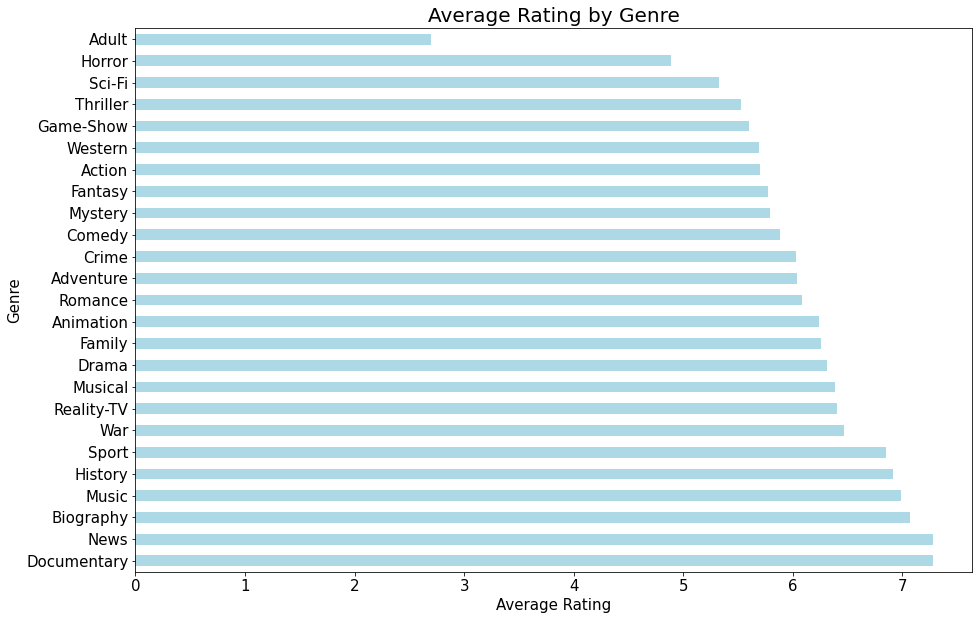

In [31]:
genre_bargraph = movie_df.plot(kind='barh', legend = False, figsize=(15,10), fontsize=15, color='lightblue')
genre_bargraph.set_title('Average Rating by Genre', fontsize=20)
genre_bargraph.set_xlabel('Average Rating', fontsize=15)
genre_bargraph.set_ylabel('Genre', fontsize=15)

Text(0, 0.5, 'Genre')

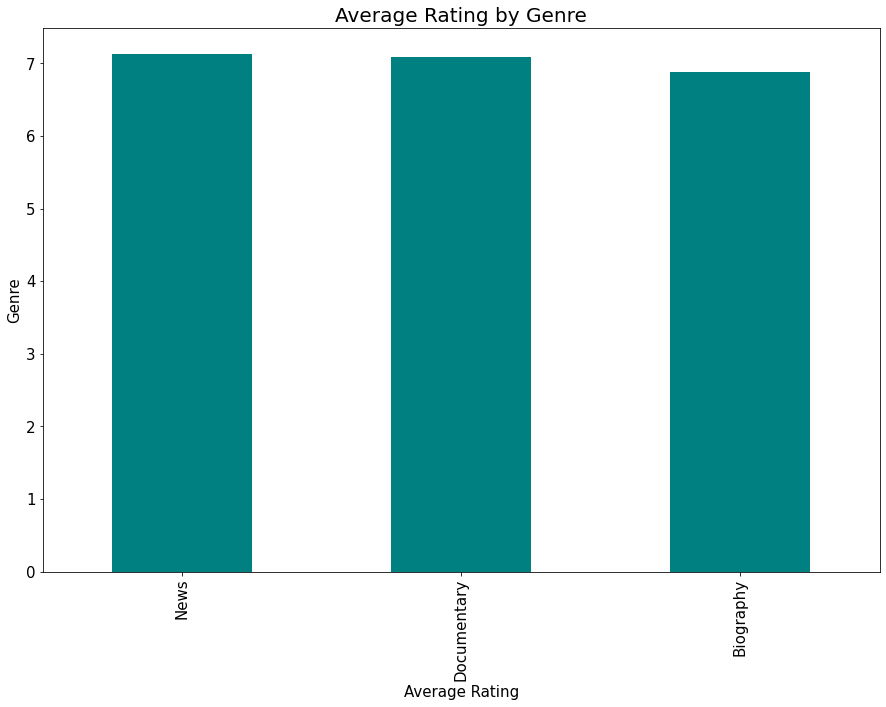

In [87]:
""" Top 3 Genres """
ranked_movies = movie_df.sort_values(by='averagerating', ascending=False)
top_genres = ranked_movies[0:3].plot(kind='bar', legend = False, figsize=(15,10), fontsize=15, color='teal')
top_genres.set_title('Average Rating by Genre', fontsize=20)
top_genres.set_xlabel('Average Rating', fontsize=15)
top_genres.set_ylabel('Genre', fontsize=15)

### List of Relevant Movies

In [80]:
pop_og_titles = list(info_ratings['original_title'])
pop_prim_titles = list(info_ratings['primary_title'])
# Checking all went into the list
print(len(pop_og_titles))

# Looking at Movie titles
print(pop_og_titles[0:10])

11621
['The Boy Who Harnessed the Wind', 'Justice League vs. the Fatal Five', 'Justice League vs. the Fatal Five', 'Justice League vs. the Fatal Five', 'Godzilla: King of the Monsters', 'Godzilla: King of the Monsters', 'Godzilla: King of the Monsters', 'The Kid Who Would Be King', 'The Kid Who Would Be King', 'The Kid Who Would Be King']


### Box Office Mojo

In [20]:
bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
""" Summary Statistics """
bom_gross.info()

# Missing Data
bom_gross.isna().any()

# Don't really need the studio name?

# Proportion of Missing Data
bom_gross.isna().sum()

# Missing a lot of information about money made in foreign market --> placeholder value using median or 0 could mean they
# didn;t make any mopney in the market?
print('Percentage of Null Foreign Gross Values:', len(bom_gross[bom_gross.foreign_gross.isna()])/ len(bom_gross))

# Checking for Duplicates
duplicates = bom_gross[bom_gross['title'].duplicated()]
print('Number of title duplicates '+ str(len(duplicates)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
Percentage of Null Foreign Gross Values: 0.3985828166519043
Number of title duplicates 1


In [85]:
bom_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [56]:
""" Univariate Analysis"""

' Univariate Analysis'

### Rotten Tomatos Movie Information

In [23]:
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [24]:
""" Data Basic Information """
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Rotten Tomatos Movie Reviews

In [20]:
rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='cp1252')
rt_reviews.head(20)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


#### Rotten Tomatos reviews questions & key points

In [ ]:
"""
These ratings are out of 5 so in order to compare to SQL database and other data files 
one of the rating scales needs to be adjusted 


"""

### TheMovie DB

In [27]:
movie_db = pd.read_csv('data/tmdb.movies.csv.gz', index_col = 0)
movie_db.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
""" Finding Average Rating and Average Number of Votes"""
avg_rating = np.average(movie_db['vote_average'])
print('Average Rating is ' + str(avg_rating))
avg_num_votes = np.average(movie_db['vote_count'])
print('Average Number of Votes is ' + str(avg_num_votes))

Average Rating is 5.991281064977184
Average Number of Votes is 194.22483689708488


#### TheMovie DB questions and key points

In [21]:
"""
What is populatiry out of and how is it measures?

"""

'\nWhat is populatiry out of and how is it measures?\n'

In [30]:
""" Data Basic Information """
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [57]:
movie_db.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


### Movie Budgets

In [18]:
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Movies that appear in all Data Sets

In [46]:
""" Finding the unique movies in the data sets provided by 
    listing unique values and creating one long set
    excluding the SQL database
"""
tmdb_unique = list(movie_db['title'].unique())
bom_gross_unique = list(bom_gross['title'].unique())
budgets_unique = list(movie_budgets['movie'].unique())
common_movies = []
for x in tmdb_unique:
    if x in bom_gross_unique:
        if x in budgets_unique:
            common_movies.append(x)
print(len(common_movies))

1170


### Combining Box Office and Numbers Data

In [30]:
""" Combining Data Set so we have more avalilable profit data """
frames = [movie_budgets, bom_gross]
money_df =pd.merge(bom_gross,movie_budgets, left_on=['title'], right_on=['movie'])
#money_df['Profit'].map(float(money_df['worldwide_gross'])-float(money_df['production_budget']))
money_df

KeyError: 'Profit'